<a href="https://colab.research.google.com/github/Mridul60/Machine-Learnings-Curriculum/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Assignment 1:*** Recognize a Digit using TensorFlow / PyTorch


# Step 0: Install required packages

# Step 1: Import Required Libraries
We first import the libraries we need for:
- **TensorFlow** → Deep learning framework to build and train our model.
- **NumPy** → To handle numeric arrays.
- **Matplotlib** → To visualize images and results.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Load the MNIST Dataset
- The MNIST dataset contains **70,000 images** of handwritten digits (0–9).
- It’s already included inside TensorFlow for quick access.
- `x_train`, `y_train` → 60,000 training samples and labels.
- `x_test`, `y_test` → 10,000 test samples and labels.
- Each image is **28×28 pixels**, grayscale.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Step 3: Normalize and Reshape the Data
1. **Normalization**: Convert pixel values from [0, 255] → [0, 1] for faster training.
2. **Reshape**: Add a channel dimension (1 for grayscale images) so that
   the data fits the CNN input format `(height, width, channels)`.


In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Step 4: Build the CNN Model
We use a **Sequential model** which stacks layers in order:

1. **Conv2D(32, (3×3), relu)** → Extracts 32 feature maps using 3×3 filters.
2. **MaxPooling2D(2×2)** → Reduces the size of feature maps by taking the max in each 2×2 window.
3. **Flatten()** → Converts 2D feature maps into a 1D vector.
4. **Dense(64, relu)** → Fully connected layer with 64 neurons for learning patterns.
5. **Dense(10, softmax)** → Output layer for 10 digit classes with probability distribution.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Compile the Model
- **Optimizer**: Adam (adaptive learning rate optimization).
- **Loss Function**: Sparse Categorical Crossentropy (good for integer labels).
- **Metrics**: Accuracy to track model performance.


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Step 6: Train the Model
- Train for 5 epochs (full passes over the training set).
- The model adjusts weights each epoch to minimize loss.


In [6]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8955 - loss: 0.3410
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9806 - loss: 0.0641
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9874 - loss: 0.0421
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9916 - loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9935 - loss: 0.0194


# Step 7: Evaluate on Test Data
- We check how well the trained model performs on unseen test data.
- Outputs: Test loss and accuracy.


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9811 - loss: 0.0547
Test accuracy: 0.9857


# Step 8: Make a Prediction
- Randomly pick one image from the test set.
- Use `model.predict()` to guess its label.
- Use `np.argmax()` to find the class with the highest probability.


In [8]:
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]
true_label = y_test[index]

prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


# Step 9: Display the Prediction
- Show the chosen test image.
- Title includes both the true label and predicted label.


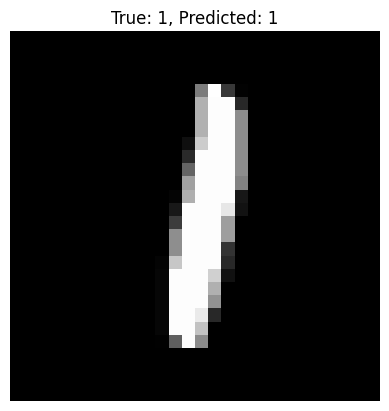

In [10]:
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()


# Step 10: Save the Model
We save the trained model as `digit_model.keras` so it can be reused later
without retraining (for example, in a Streamlit app).


In [11]:
model.save('digit_model.keras')
